# Import Packages

In [1]:
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
import torchsummary
import torchvision
import torch

In [2]:
from IPython.display import Image

# Load Dataset


- Image Path(train) : /dataset/train
- Image Path(test) : /dataset/test
- Image Path(valid) : /dataset/valid
- Input Image resize : Height X Width  32 X 32
- Batch Size : 100

## Problem 1

In [ ]:
#Defining plotting settings
plt.rcParams['figure.figsize'] = 14, 6


#Initializing normalizing transform for the dataset
normalize_transform = torchvision.transforms.Compose(?)


train_dataset = datasets.ImageFolder(?)
    
test_dataset = datasets.ImageFolder(?)

valid_dataset = datasets.ImageFolder(?)



#Generating data loaders from the corresponding datasets
train_loader = DataLoader(?)
test_loader = DataLoader(?)
valid_loader = DataLoader(?)

In [7]:
dataiter = iter(train_loader)

In [8]:
images, labels = dataiter.next()

In [9]:
labels.shape

torch.Size([100])

# Data Visualization

(-0.5, 165.5, 66.5, -0.5)

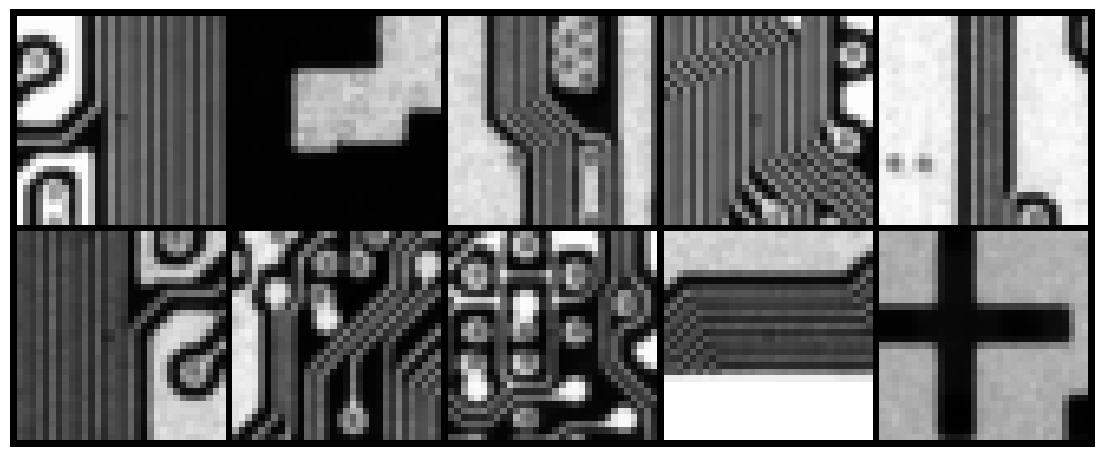

In [10]:
#Plotting 25 images from the 1st batch 
dataiter = iter(train_loader)
images, labels = dataiter.next()
plt.imshow(np.transpose(torchvision.utils.make_grid(
  images[:10], normalize=True, padding=1, nrow=5).numpy(), (1, 2, 0)))
plt.axis('off')

# Check Classes

Text(0, 0.5, 'Number of training instances')

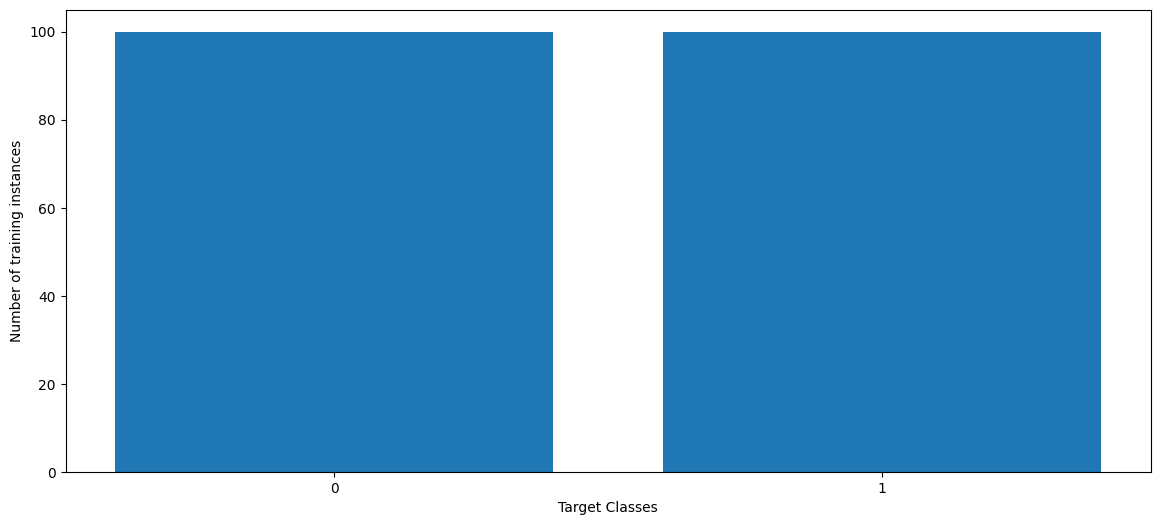

In [11]:
classes = []
for batch_idx, data in enumerate(train_loader, 0):
    x, y = data 
    classes.extend(y.tolist())
      
#Calculating the unique classes and the respective counts and plotting them
unique, counts = np.unique(classes, return_counts=True)
names = list(test_dataset.class_to_idx.keys())
plt.bar(names, counts)
plt.xlabel("Target Classes")
plt.ylabel("Number of training instances")

## CNN Archetecture
![simpleCNN_torch1](https://github.com/jhkim01/newComer/blob/master/asset/simpleCNN_torch1.JPG)

 # Build CNN

## Problem 2
- Input size : 32 X 32 X 3
- Class : 2
- 위 4.1 의 CNN 모델을 구성하시오

In [ ]:
class CNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels = ?, out_channels = ?, kernel_size = ?, padding = ?), 
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=?),
  
            torch.nn.Conv2d(in_channels = ?, out_channels = ?, kernel_size = ?, padding = ?),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=?),
              
            torch.nn.Conv2d(in_channels = ?, out_channels = ?, kernel_size = ?, padding = ?),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=?),
  
            torch.nn.Flatten(),
            torch.nn.Linear(?, ?),
            torch.nn.ReLU(),
            torch.nn.Linear(?, ?)
        )
  
    def forward(self, x):
        return self.model(x)

In [ ]:
device = 'cpu'
model = CNN().to(device)
torchsummary.summary(model,(3,32,32), device=device)

In [ ]:
print(model)

# Train your Model for classification.

In [ ]:
#Selecting the appropriate training device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CNN().to(device)
  
#Defining the model hyper parameters
num_epochs = 5
learning_rate = 0.001
weight_decay = 0.01
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
  
#Training process begins
train_loss_list = []
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}:', end = ' ')
    train_loss = 0
      
    #Iterating over the training dataset in batches
    model.train()
    for i, (images, labels) in enumerate(train_loader):          
        #Extracting images and target labels for the batch being iterated
        images = images.to(device)
        labels = labels.to(device)  
        #Calculating the model output and the cross entropy loss
        outputs = model(images)
        loss = criterion(outputs, labels)  
        #Updating weights according to calculated loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
      
    #Printing loss for each epoch
    train_loss_list.append(train_loss/len(train_loader))
    print(f"Training loss = {train_loss_list[-1]}")   
      
#Plotting loss for all epochs
plt.plot(range(1,num_epochs+1), train_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")

# Result

In [ ]:
test_acc=0
model.eval()
  
with torch.no_grad():
    #Iterating over the training dataset in batches
    for i, (images, labels) in enumerate(test_loader):
          
        images = images.to(device)
        y_true = labels.to(device)
          
        #Calculating outputs for the batch being iterated
        outputs = model(images)
        
        #Calculated prediction labels from models
        _, y_pred = torch.max(outputs.data, 1)
          
        #Comparing predicted and true labels
        test_acc += (y_pred == y_true).sum().item()
      
    print(f"Test set accuracy = {100 * test_acc / len(test_dataset)} %")

## Problem 3
9개의 이미지를 Predict label과 Actual Label을 비교하여 표시하고 3 X 3의 형태로 이미지를 출력 하시오
- 아래 이미지는 출력 예시. 출력이미지와 Predict label이 같지 않아도 상관없습니다.
![simpleCNN_torch2](./asset/visual_torch.JPG)

In [ ]:
num_images = 9
y_true_name = [names[y_true[idx]] for idx in range(num_images)] 
y_pred_name = [names[y_pred[idx]] for idx in range(num_images)] 

# ----------------------------------------------------------------------------------------------------------------------------------
# Code를 작성하세요
